In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/international-migration-flow-canada/Canada.csv


In [47]:
df=pd.read_csv('/kaggle/input/international-migration-flow-canada/Canada.csv')
df.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,FIELD44,FIELD45,FIELD46,FIELD47,FIELD48,FIELD49,FIELD50,FIELD51
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2635,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,620,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3774,4331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df.columns

Index(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', 'FIELD44', 'FIELD45', 'FIELD46', 'FIELD47', 'FIELD48',
       'FIELD49', 'FIELD50', 'FIELD51'],
      dtype='object')

In [49]:
df.shape

(197, 51)

# Cleaning the Dataset


Dropping unncessary columns and rows

In [50]:
#inplace is used to keep the dataset in df var otherwise it will be created as a new dataset
#axis=1 means we are dropping columns, axis=0 mean row
df.drop(['AREA','REG','DEV','Type','Coverage', 'FIELD44','FIELD45','FIELD46','FIELD47','FIELD48','FIELD49','FIELD50','FIELD51'], axis=1, inplace=True)
df.drop([195,196],axis=0,inplace=True)
df

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
192,Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,...,124,161,140,122,133,128,211,160,174,217
193,Zambia,Africa,Eastern Africa,Developing regions,11,17,11,7,16,9,...,56,91,77,71,64,60,102,69,46,59


Rename the columns so that they make sense. 

In [51]:
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df.columns

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')

Adding a column 'Total' that sums up the total immigrants by country over the entire period 1980 - 2013

In [52]:
#To check Null Values
df.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
dtype: int64

In [53]:
df.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,508.394872,566.989744,534.723077,387.435897,376.497436,358.861538,441.271795,691.133333,714.389744,843.241026,...,1190.169231,1320.292308,1266.958974,1191.820513,1246.394872,1275.733333,1420.287179,1262.533333,1313.958974,1320.702564
std,1949.588546,2152.643752,1866.997511,1204.333597,1198.246371,1079.309600,1225.576630,2109.205607,2443.606788,2555.048874,...,3710.505369,4425.957828,3926.717747,3443.542409,3694.573544,3829.630424,4462.946328,4030.084313,4247.555161,4237.951988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,...,19.000000,28.500000,25.000000,31.000000,31.000000,36.000000,40.500000,37.500000,42.500000,45.000000
50%,13.000000,10.000000,11.000000,12.000000,13.000000,17.000000,18.000000,26.000000,34.000000,44.000000,...,191.000000,210.000000,218.000000,198.000000,205.000000,214.000000,211.000000,179.000000,233.000000,213.000000
75%,251.500000,295.500000,275.000000,173.000000,181.000000,197.000000,254.000000,434.000000,409.000000,508.500000,...,756.500000,832.000000,842.000000,899.000000,934.500000,888.000000,932.000000,772.000000,783.000000,796.000000
max,22045.000000,24796.000000,20620.000000,10015.000000,10170.000000,9564.000000,9470.000000,21337.000000,27359.000000,23795.000000,...,36619.000000,42584.000000,33848.000000,28742.000000,30037.000000,29622.000000,38617.000000,36765.000000,34315.000000,34129.000000


**Indexing and Selection in Pandas**

In [54]:
df.Country

0         Afghanistan
1             Albania
2             Algeria
3      American Samoa
4             Andorra
            ...      
190          Viet Nam
191    Western Sahara
192             Yemen
193            Zambia
194          Zimbabwe
Name: Country, Length: 195, dtype: object

In [55]:
df[['Country','1980','1981','1982','1983','1984']]

,Country,1980,1981,1982,1983,1984
0,Afghanistan,16,39,39,47,71
1,Albania,1,0,0,0,0
2,Algeria,80,67,71,69,63
3,American Samoa,0,1,0,0,0
4,Andorra,0,0,0,0,0
...,...,...,...,...,...,...
190,Viet Nam,1191,1829,2162,3404,7583
191,Western Sahara,0,0,0,0,0
192,Yemen,1,2,1,6,0
193,Zambia,11,17,11,7,16


There are main 2 ways to select rows:

- df.loc[label]    # filters by the labels of the index/column
- df.iloc[index]   # filters by the positions of the index/column

In [56]:
#to look for a country detail we are setting the index country-wise
df.set_index('Country', inplace=True)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [57]:
df.loc['Bangladesh']

Continent                  Asia
Region            Southern Asia
DevName      Developing regions
1980                         83
1981                         84
1982                         86
1983                         81
1984                         98
1985                         92
1986                        486
1987                        503
1988                        476
1989                        387
1990                        611
1991                       1115
1992                       1655
1993                       1280
1994                       1361
1995                       2042
1996                       2824
1997                       3378
1998                       2202
1999                       2064
2000                       3119
2001                       3831
2002                       2944
2003                       2137
2004                       2660
2005                       4171
2006                       4014
2007                       2897
2008    

In [58]:
df.iloc[14]

Continent                  Asia
Region            Southern Asia
DevName      Developing regions
1980                         83
1981                         84
1982                         86
1983                         81
1984                         98
1985                         92
1986                        486
1987                        503
1988                        476
1989                        387
1990                        611
1991                       1115
1992                       1655
1993                       1280
1994                       1361
1995                       2042
1996                       2824
1997                       3378
1998                       2202
1999                       2064
2000                       3119
2001                       3831
2002                       2944
2003                       2137
2004                       2660
2005                       4171
2006                       4014
2007                       2897
2008    

In [59]:
df[df.index == 'Bangladesh']

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789


In [60]:
df.loc['Bangladesh', '2013']

3789

In [61]:
df.iloc[14, 36]

3789

In [62]:
df.loc['Haiti']

Continent    Latin America and the Caribbean
Region                             Caribbean
DevName                   Developing regions
1980                                    1666
1981                                    3692
1982                                    3498
1983                                    2860
1984                                    1418
1985                                    1321
1986                                    1753
1987                                    2132
1988                                    1829
1989                                    2377
1990                                    2379
1991                                    2829
1992                                    2399
1993                                    3655
1994                                    2100
1995                                    2014
1996                                    1955
1997                                    1645
1998                                    1295
1999      

In [63]:
df.loc['Haiti','2010']

4744

In [64]:
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [72]:
haiti = df.loc['Haiti', years]
haiti

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
1985    1321
1986    1753
1987    2132
1988    1829
1989    2377
1990    2379
1991    2829
1992    2399
1993    3655
1994    2100
1995    2014
1996    1955
1997    1645
1998    1295
1999    1439
2000    1631
2001    2433
2002    2174
2003    1930
2004    1652
2005    1682
2006    1619
2007    1598
2008    2491
2009    2080
2010    4744
2011    6503
2012    5868
2013    4152
Name: Haiti, dtype: object

**Filtering based on a criteria**

In [66]:
asia = df['Continent']=='Asia'
asia

Country
Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Viet Nam           True
Western Sahara    False
Yemen              True
Zambia            False
Zimbabwe          False
Name: Continent, Length: 195, dtype: bool

In [67]:
#Dataset where continent is asia
df[asia]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,147,224,218,198,205,267,252,236,258,207
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,...,230,359,236,203,125,165,209,138,161,57
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,...,12,12,12,22,9,35,28,21,39,32
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,1,5,10,7,36,865,1464,1879,1075,487
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,...,3,4,5,11,10,5,12,6,3,6
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,...,348,370,529,460,354,203,200,196,233,288
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


In [68]:
#multiple criteria
south_asia = (df['Continent']=='Asia') & (df['Region'] == 'Southern Asia')
df[south_asia]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,...,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,...,1,5,10,7,36,865,1464,1879,1075,487
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,...,1,0,0,2,1,7,4,3,1,1
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,...,404,607,540,511,581,561,1392,1129,1185,1308
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4495,4930,4714,4123,4756,4547,4422,3309,3338,2394


In [69]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

# Line Plot

<Axes: >

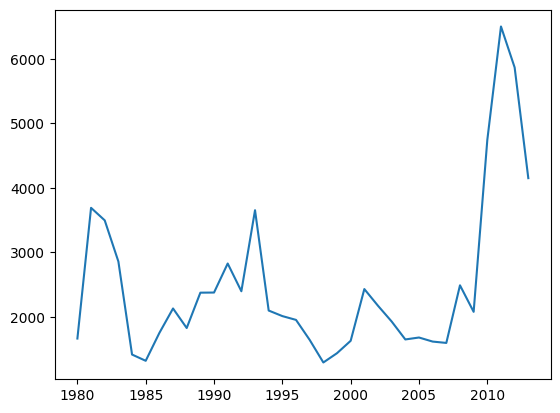

In [73]:
haiti.plot()

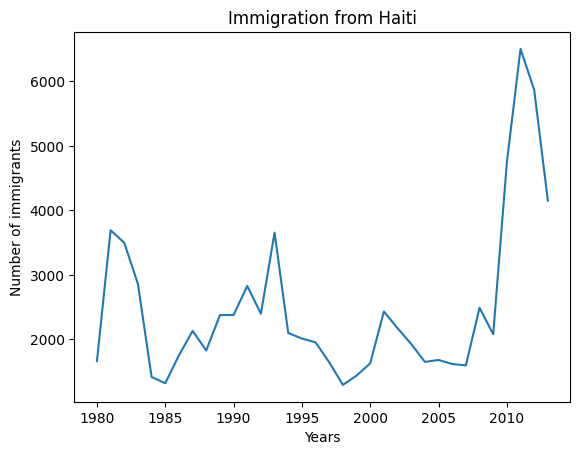

In [74]:
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

In 2010, Haiti suffered a catastrophic magnitude 7.0 earthquake. The quake caused widespread devastation and loss of life and about three million people were affected by this natural disaster. As part of Canada's humanitarian effort, the Government of Canada stepped up its effort in accepting refugees from Haiti.

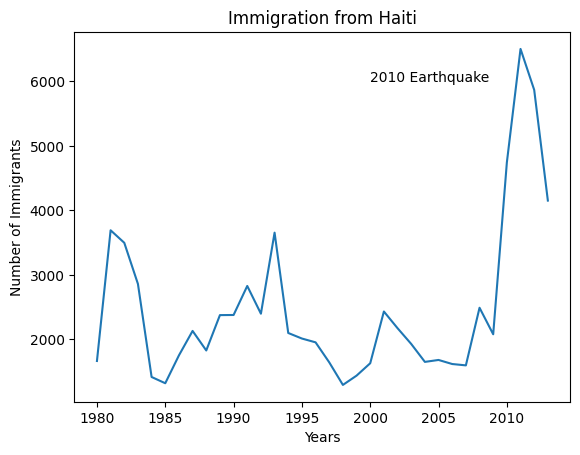

In [75]:
haiti.index = haiti.index.map(int) 
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 

plt.text(2000, 6000, '2010 Earthquake') 

plt.show() 

In [77]:
df_CI = df.loc[['India', 'China'], years]
df_CI

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


<Axes: xlabel='Country'>

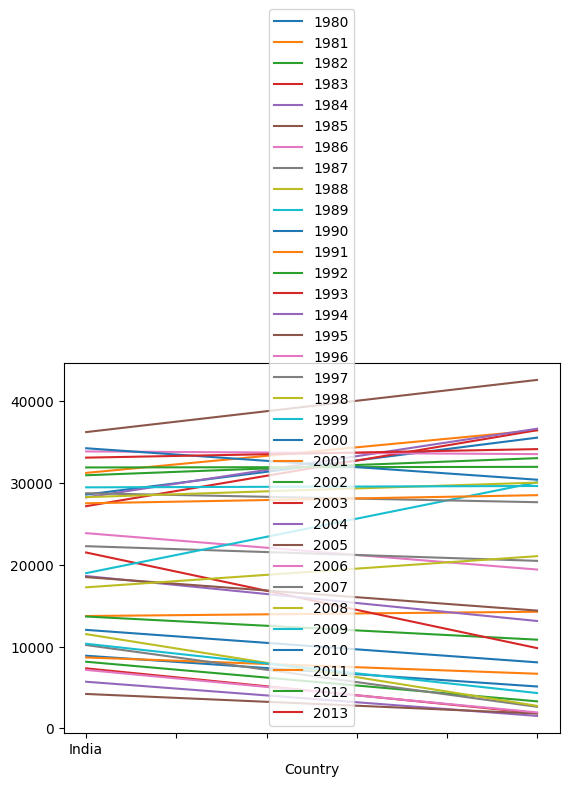

In [78]:
df_CI.plot(kind='line')

In [79]:
df_CI = df_CI.transpose()
df_CI.head()

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


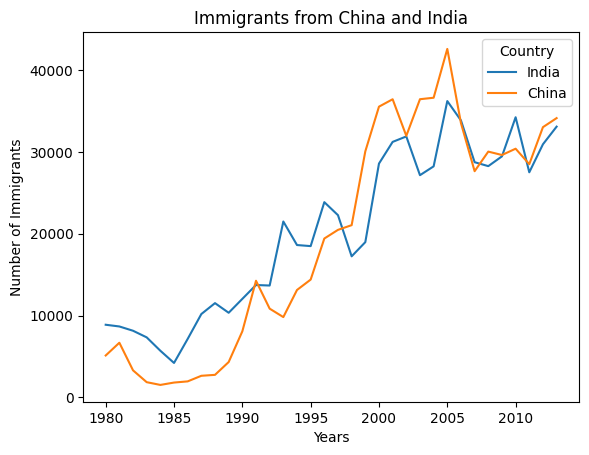

In [80]:
df_CI.index = df_CI.index.map(int) # let's change the index values of df_CI to type integer for plotting
df_CI.plot(kind='line')

plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()